### Introduction:

This notebook aims to perform a thorough exploratory data analysis (EDA) on the Wine Dataset. After viewing and cleaning the data, visualisation and discussions are done on the price and points of wines and how they correlate.
Following this, the data pertaining to each country is evaluated, particularly the count, average price and average points of each country. A similar analysis is then done for the different wine varieties. We then study the top produced wine varieties in the top producing countries. Lasty we look at the descriptions of the wines through a Word Cloud.

In [ ]:
"""Program to perform exploratory data analysis (EDA) on Wine Dataset.

Load the data.
-----
Examine the data:
-----
  View first 5 entries.
  View the DataFrame shape.
  View the column information.
  View the description of numerical columns.
  View the number of unique values in each column.
  View the amount of missing data.
-----
Clean the data:
-----
  Remove unnecessary columns.
  Remove duplicate rows.
  Handle further missing data.
-----
Visualisations:
-----
  Price and Points:
    Create a histogram and count plot of the price and points data.
    Create a pair plot of the price and points data.
  Countries:
    Create a count plot of wines in each country.
    View this as a series to check exact values.
    Create a bar plot of the average price of wine in each country.
    Create a bar plot of the average points of wine in each country.
    View the combined results for each country.
  Wine Varieties:
    Create a count plot of the top 20 wine varieties.
    Create a bar plot of the average price of the top 20 wine varieties.
    Create a bar plot of the average points of the top 20 wine varieties.
    View the combined results for the top 20 wine varieties.
    Create a scatter plot of the average prices and average points of each wine
    variety and view the top and bottom varieties by average price and points.
  Countries and Their Top Wine Varieties:
    Create plots of the top 6 wine producing countries with their top 5 wine
    varieties and the count, average price and average points of each variety.
  Descriptions:
    Create a Word Cloud from all the wine descriptions.

-----
Functions:
-----
  missing_values(df):
    Determine the number and percentage of missing values in each column of a
    dataframe.

    Return the information as a dataframe.

    Parameters:
    -----
      df : DataFrame

    Returns:
    -----
      missing_data_info : DataFrame

  count_and_percent_by_group(column, df):
    Find and plot the count of entries of groups in a dataframe.
    If the number of groups is greater than 24, take the top 20 groups by count.

    Parameters:
    -----
      column : str
      df : DataFrame

    Returns:
    -----
      None

  avg_price_by_group(column,df):
    Calculate and plot the median price of groups in a dataframe.
    If the number of groups is greater than 24, take the top 20 groups.

    Parameters:
    -----
      column : str
      df : DataFrame

    Returns:
    -----
      None

  normalized_avg_points_by_group(column,df):
    Calculate and plot the normalized mean points of groups in a dataframe.
    If the number of groups is greater than 24, take the top 20 groups.

    Parameters:
    -----
      column : str
      df : DataFrame

    Returns:
    -----
      None

  normalized_values_by_group(column, df):
  Calculate and plot the normalized count, price and points of groups in a
  dataframe.
  If the number of groups is greater than 24, take the top 20 groups.

  Parameters:
  -----
    column : str
    df : DataFrame

  Returns:
  -----
    None
"""

'Program to perform exploratory data analysis (EDA) on Wine Dataset.\n\nLoad the data.\n-----\nExamine the data:\n-----\n  View first 5 entries.\n  View the DataFrame shape.\n  View the column information.\n  View the description of numerical columns.\n  View the number of unique values in each column.\n  View the amount of missing data.\n-----\nClean the data:\n-----\n  Remove unnecessary columns.\n  Remove duplicate rows.\n  Handle further missing data.\n-----\nVisualisations:\n-----\n  Price and Points:\n    Create a histogram and count plot of the price and points data.\n    Create a pair plot of the price and points data.\n  Countries:\n    Create a count plot of wines in each country.\n    View this as a series to check exact values.\n    Create a bar plot of the average price of wine in each country.\n    Create a bar plot of the average points of wine in each country.\n    View the combined results for each country.\n  Wine Varieties:\n    Create a count plot of the top 20 wine

### Load Data:

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import chardet
# Plotting and visualisation modules
from mlxtend.preprocessing import minmax_scaling, standardize
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# File to be read
file_name = 'wine.csv'

# Detect encoding
with open(file_name, 'rb') as f:
    result = chardet.detect(f.read())

# Read the file with detected encoding
wine_df = pd.read_csv(file_name, encoding=result['encoding'])

### View Data:

This section can be run individually to keep viewing the various states of the data throughout the analysis.

##### First 5 entries:

In [ ]:
# Look at first 5 entries
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


Even with the file being read with detected encoding, some of the symbols are still being read incorrectly. It appears this cannot be helped.

##### Shape of DataFrame:

In [ ]:
# Get shape of DataFrame
print("Number of rows and columns:\n")
wine_df.shape

Number of rows and columns:



(1103, 11)

##### Column Information:

In [ ]:
# Get information of each column
print("Information of each column:\n")
wine_df.info()

Information of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


##### Description of Numerical Columns:

In [ ]:
# Get a description of the data
print("Description of numerical data columns:\n")
wine_df.describe()

Description of numerical data columns:



,Unnamed: 0,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


##### Unique Values:

In [ ]:
# Find the number of unique values in each column
unique_counts = wine_df.nunique()

# Print the result
print("Number of unique values in each column:\n")
print(unique_counts)

Number of unique values in each column:

Unnamed: 0     1103
country          22
description    1061
designation     714
points           12
price           100
province        100
region_1        214
region_2         18
variety         124
winery          846
dtype: int64


##### Number and percent of missing values:

A function has been created to be able to view the missing data at various stages of data cleaning.

In [ ]:
def missing_values(df):
  """Determine the number and percentage of missing values in each column of a
  dataframe.

  Return the information as a dataframe.

  Parameters:
  -----
    df : DataFrame

  Returns:
  -----
    missing_data_info : DataFrame
  """

  # Count the number of missing values for each column and calculate percentage
  nan_counts = df.isna().sum().sort_values(ascending = False)
  total_rows = df.shape[0]
  percent_nan_counts = (nan_counts/total_rows)*100

  # Combine nan_counts and percent_nan_counts into a DataFrame
  missing_data_info = pd.concat([nan_counts, percent_nan_counts], axis=1, keys=['Missing Values', 'Percent of Missing Values'])

  return missing_data_info

View the missing data:

In [ ]:
print(missing_values(wine_df))

             Missing Values  Percent of Missing Values
region_2                611                  55.394379
designation             269                  24.388033
region_1                173                  15.684497
price                    57                   5.167724
Unnamed: 0                0                   0.000000
country                   0                   0.000000
description               0                   0.000000
points                    0                   0.000000
province                  0                   0.000000
variety                   0                   0.000000
winery                    0                   0.000000


### Data Cleaning:

#### Remove Unnecessary Columns:

We may remove the first column which is just an extra index column. The columns of 'region_1', 'region_2' and 'designation' have too much missing information to be replaced appropriately. These too may be dropped.

In [ ]:
# Drop unnecessary columns
wine_df.drop(columns=['Unnamed: 0','region_1','region_2','designation'], inplace=True)
print("Columns have been successfully removed.")

Columns have been successfully removed.


#### Handling Duplicates:

In [ ]:
# Check for duplicate rows
print("Number of duplicate rows:\n")
wine_df.duplicated().sum()

Number of duplicate rows:



42

In [ ]:
# Remove duplicate rows
wine_df=wine_df.drop_duplicates()
wine_df=wine_df.reset_index(drop=True)
print("Duplicate rows removed successfully.")

Duplicate rows removed successfully.


#### Deal with any further missing values:

In [ ]:
print(missing_values(wine_df))

             Missing Values  Percent of Missing Values
price                    54                   5.089538
country                   0                   0.000000
description               0                   0.000000
points                    0                   0.000000
province                  0                   0.000000
variety                   0                   0.000000
winery                    0                   0.000000


Only ~5% of the entries are missing prices. We may drop the rows with missing price.

In [ ]:
wine_df.dropna(subset=['price'], inplace=True)
print("Rows with missing price values have been removed.")

Rows with missing price values have been removed.


### Visualisations:

First we will look at the overall price and points data and how they are related. Following this, we will focus on the various countries and their wine counts, average prices and average points. We will do a similar study for the wine varieties, followed by a study of the top wine varieties in the top producing wine countries. Lastly, we shall create a Word Cloud frm all the wine descriptions.

#### Price and Points:

We will look at the distribution of price and points amongst the wine data.

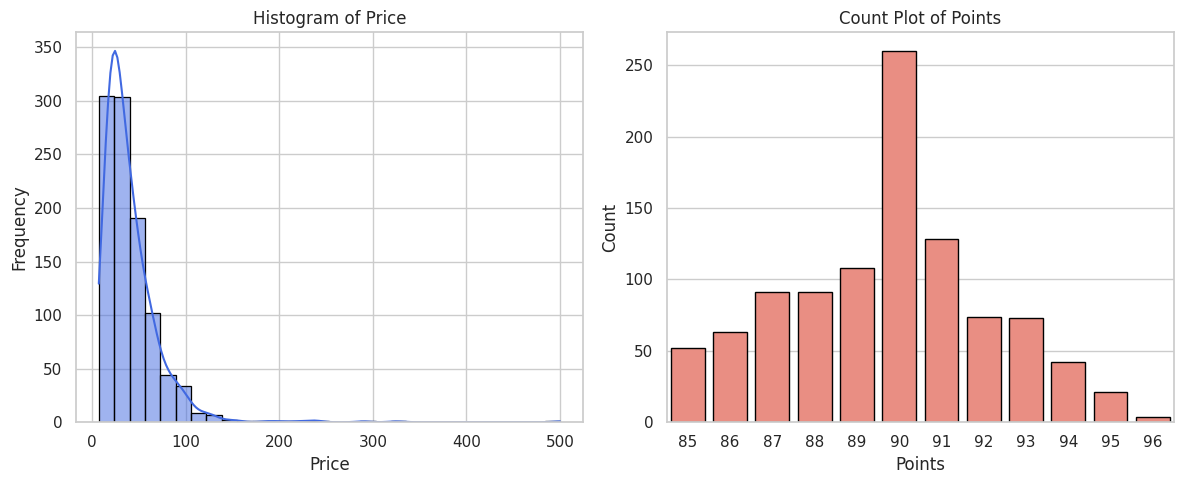

In [ ]:
# Create figure with subplots
fig, axes = plt.subplots(1,2, figsize=(12, 5))

# Plot the histogram for 'price'
sns.histplot(wine_df['price'], bins=30, kde=True, color='royalblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot the count plot for 'points'
sns.countplot(x='points', data=wine_df, color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Count Plot of Points')
axes[1].set_xlabel('Points')
axes[1].set_ylabel('Count')

# Show plots
plt.tight_layout()
plt.show()

From this we see that most of the wine prices are  below \$100 with a few outliers ranging up to ~\$500.

The wines in this data set are all fairly highly rated wines, with the most common points value given to be 90 points, with slightly more wines having points below 90 than above.

Let us look at the general relationship between the price of wine and points.

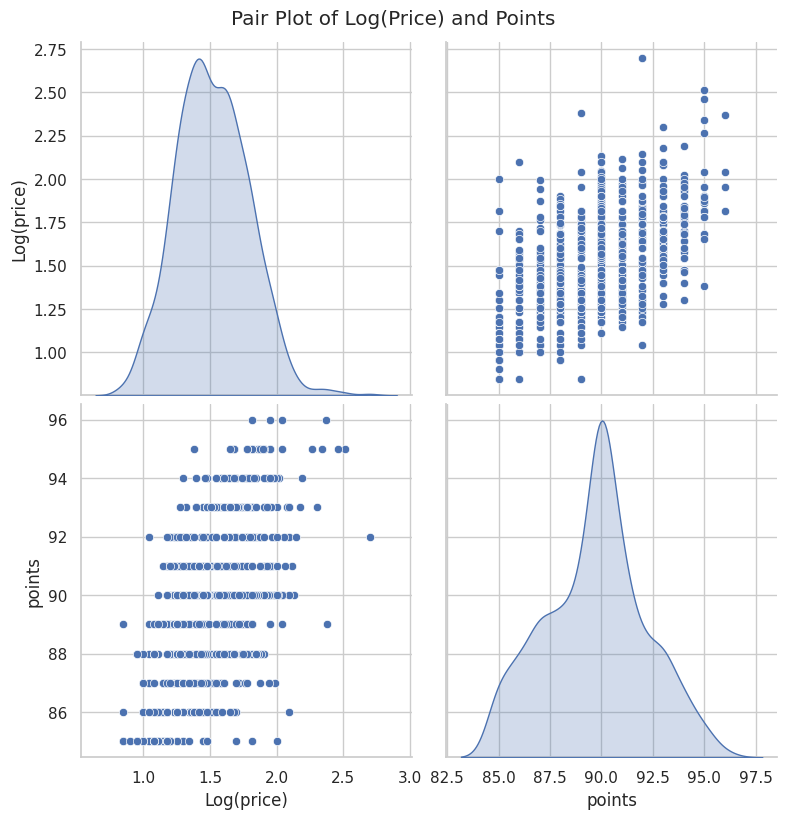

In [ ]:
# Create an extra column for the log of 'price'
wine_df['Log(price)'] = np.log10(wine_df['price'])

# Select relevant columns
pair_plot_data = wine_df[['Log(price)', 'points']]

# Create a pair plot
sns.set(style="whitegrid")
fg = sns.pairplot(pair_plot_data, height=4, diag_kind='kde', markers='o')
fg.fig.suptitle("Pair Plot of Log(Price) and Points", y=1.02)
plt.show()

The log scale makes the data easier to visualise as most of the wines are situated around the lower price range and the few outliers in the higher price range would make it difficult to see any patterns amongst the majority of the wine since they would be condensed to a small area in the lower end of the price range. This log scale allowed us to see a much clearer pattern between the price and the points, where there is a weak yet clear positive correlation between the two values.

#### Countries and Wine Varieties:

For these two studies on countries and wine varieties, some functions will be useful in order to make the same visualisations for both.

##### Functions

For the count of entries for each group we have the following function:

In [ ]:
def count_and_percent_by_group(column, df):
  """Find and plot the count of entries of groups in a dataframe.
  If the number of groups is greater than 24, take the top 20 groups by count.

  Parameters:
  -----
    column : str
    df : DataFrame

  Returns:
  -----
    None
  """

  # Find the count of entries in each group
  data_counts = df[column].value_counts()

  # Plots of top 20 groups if groups excede 24
  if len(data_counts) > 24:
    data_counts = data_counts.head(20)

    # Create figure with subplots
    fig, axes = plt.subplots(1,2, figsize=(12, 6))

    # Count plot
    sns.countplot(x=column, data=df, order=data_counts.index, ax=axes[0], color='orchid', edgecolor='black')
    plt.xticks(rotation=90)
    axes[0].set_title(f'Count of Entries for Each {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)

    # Percentage of count
    percentage = (data_counts / len(df)) * 100
    sns.barplot(x=percentage.index, y=percentage.values, color='orchid', edgecolor='black')
    axes[1].set_title(f'Percentage of Count for Each {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=90)

    # Show plot
    plt.tight_layout()
    plt.show()

  # Plots of all groups if groups are less than 24
  else:
    # Create figure with subplots
    fig, axes = plt.subplots(1,2, figsize=(12, 6))

    # Count plot
    sns.countplot(x=column, data=df, order=data_counts.index, ax=axes[0], color='orchid', edgecolor='black')
    plt.xticks(rotation=90)
    axes[0].set_title(f'Count of Entries for Each {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)

    # Percentage of count
    percentage = (data_counts / len(df)) * 100
    sns.barplot(x=percentage.index, y=percentage.values, color='orchid', edgecolor='black')
    axes[1].set_title(f'Percentage of Count for Each {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=90)

    # Show plot
    plt.tight_layout()
    plt.show()

Two functions have been created to plot the average price and the normalized average points by a chosen group. Since the price data is skewed to the left with outliers in the higher price range, we shall use the median price of each group to represent the average. The average points will be normalized to view discrepancies in the results better.

In [ ]:
def avg_price_by_group(column,df):
  """Calculate and plot the median price of groups in a dataframe.
  If the number of groups is greater than 24, take the top 20 groups.

  Parameters:
  -----
    column : str
    df : DataFrame

  Returns:
  -----
    None
  """

  # Find average price by specified group
  avg_price = df.groupby(column)['price'].median().sort_values(ascending=False)

  # Create subplots
  plt.figure(figsize=(12, 6))

  # Plots of top 20 groups if groups excede 24
  if len(avg_price) > 24:
    avg_price = avg_price.head(20)
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Price')
    plt.show()

  # Plots of all groups if groups are less than 24
  else:
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Price')
    plt.show()


def normalized_avg_points_by_group(column,df):
  """Calculate and plot the normalized mean points of groups in a dataframe.
  If the number of groups is greater than 24, take the top 20 groups.

  Parameters:
  -----
    column : str
    df : DataFrame

  Returns:
  -----
    None
  """

  # Find normalized average points by specified group
  avg_points = df.groupby(column)['points'].mean().sort_values(ascending=False)
  normalized_points = minmax_scaling(avg_points.values.reshape(-1, 1), columns=[0])
  avg_points_normalized = pd.DataFrame(normalized_points, index=avg_points.index, columns=['Normalized Points'])

  # Create subplots
  plt.figure(figsize=(12, 6))

  # Plots of top 20 groups if groups excede 24
  if len(avg_points) > 24:
    avg_points_normalized = avg_points_normalized.head(20)
    sns.barplot(x=avg_points_normalized.index, y=avg_points_normalized['Normalized Points'], palette='flare', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Normalized Average Points by {column}')
    plt.xlabel(column)
    plt.ylabel('Normalized Average Points')
    plt.show()

  # Plots of all groups if groups are less than 24
  else:
    sns.barplot(x=avg_points_normalized.index, y=avg_points_normalized['Normalized Points'], palette='flare', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Normalized Average Points by {column}')
    plt.xlabel(column)
    plt.ylabel('Normalized Average Points')
    plt.show()

Finally, we wish to view all the normalized values of the count, average price and average points for each group. In the function we have the choice to order the results in descending order of either count, price or points.

In [ ]:
def normalized_values_by_group(column, df):
  """Calculate and plot the normalized count, price and points of groups in a
  dataframe.
  If the number of groups is greater than 24, take the top 20 groups.

  Parameters:
  -----
    column : str
    df : DataFrame

  Returns:
  -----
    None

  """

  # Calculate normalized price, points, and count for each country
  normalized_price = minmax_scaling(df.groupby(column)['price'].median().values.reshape(-1, 1), columns=[0])
  normalized_points = minmax_scaling(df.groupby(column)['points'].mean().values.reshape(-1, 1), columns=[0])
  normalized_count = minmax_scaling(df[column].value_counts().values.reshape(-1, 1), columns=[0])

  # Create DataFrames with normalized values and country names
  normalized_price_df = pd.DataFrame(normalized_price, index=df.groupby(column)['price'].median().index, columns=['Normalized Price'])
  normalized_points_df = pd.DataFrame(normalized_points, index=df.groupby(column)['points'].mean().index, columns=['Normalized Points'])
  normalized_count_df = pd.DataFrame(normalized_count, index=df[column].value_counts().index, columns=['Normalized Count'])

  # Concatenate DataFrames
  normalized_data = pd.concat([normalized_price_df, normalized_points_df, normalized_count_df], axis=1)

  # Choose whether to order data by counts, price or points
  while True:
      order_value = input("""
Would you like to order the result by:

1 : count
2 : price
3 : points

Please enter 1, 2 or 3:
""")
      # Order by counts
      if order_value == '1':
        normalized_data = normalized_data.sort_values(by='Normalized Count', ascending=False)
        break

      # Order by price
      elif order_value == '2':
        normalized_data = normalized_data.sort_values(by='Normalized Price', ascending=False)
        break

      # Order by points
      elif order_value == '3':
        normalized_data = normalized_data.sort_values(by='Normalized Points', ascending=False)
        break

      else:
        print("\nInvalid input. Please try again.")

  # Find number of groups
  normalized_df_length = len(normalized_data)
  # If number of groups excedes 24, take top 20
  if normalized_df_length > 24:
    normalized_data = normalized_data.head(20)


  # Split into two DataFrames
  half_len = len(normalized_data) // 2
  first_half = normalized_data.iloc[:half_len, :]
  second_half = normalized_data.iloc[half_len:, :]

  # Plot the first half
  plt.figure(figsize=(15, 8))
  first_half.plot(kind='bar', colormap='viridis', edgecolor='black', width=0.8)
  plt.title(f'Normalized Price, Points, and Count by {column} (First Half)')
  plt.xlabel(column)
  plt.ylabel('Normalized Values')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

  # Plot the second half
  plt.figure(figsize=(15, 8))
  second_half.plot(kind='bar', colormap='viridis', edgecolor='black', width=0.8)
  plt.title(f'Normalized Price, Points, and Count by {column} (Second Half)')
  plt.xlabel(column)
  plt.ylabel('Normalized Values')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

##### Countries:

For the analysis on the different countries, we will need the following inputs for the functions:

In [ ]:
# Inputs for functions for countries analysis
column = 'country'
df = wine_df

###### Wine Count per Country:

Let us see which countries have the highest count of wine from the dataset.

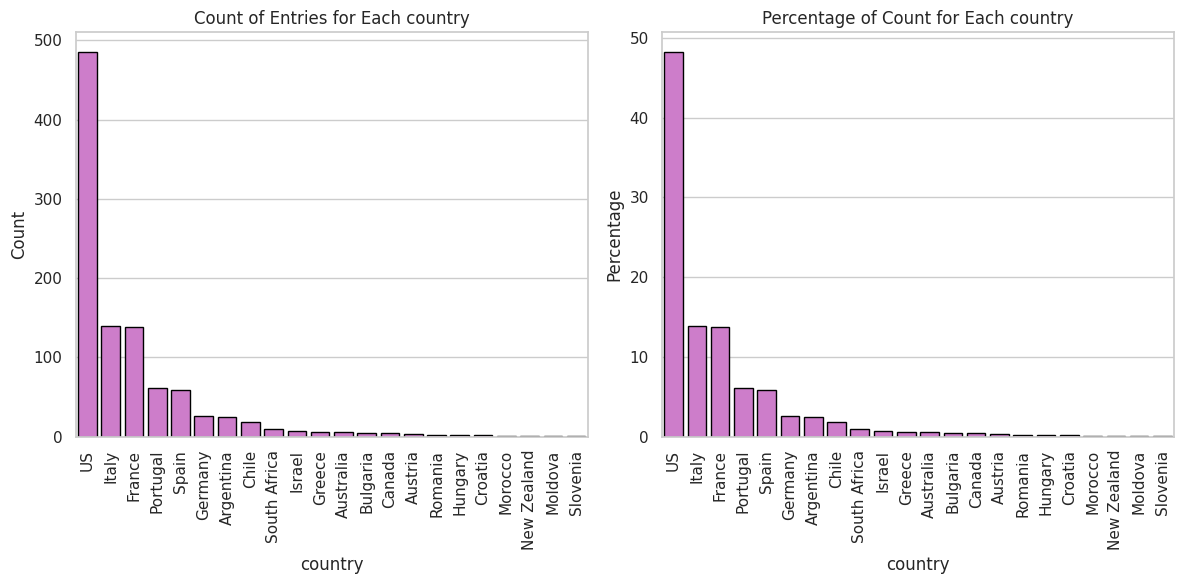

In [ ]:
# Plot wine count for each country
count_and_percent_by_group(column, df)

We see that almost half the wines listed in this dataset are from the US. Following the US, Italy and France respectively have the next highest counts of wines. We see that there are many countries with very low wine counts, likely with only one or two entries. Let us see exactly how many wines are listed for each country.

In [ ]:
# Print the count of wines in each country
wine_count_by_country = wine_df['country'].value_counts()
print("Country:\tCount:\n")
print(wine_count_by_country)

Country:	Count:

US              486
Italy           140
France          138
Portugal         62
Spain            59
Germany          26
Argentina        25
Chile            19
South Africa     10
Israel            7
Greece            6
Australia         6
Bulgaria          5
Canada            5
Austria           3
Romania           2
Hungary           2
Croatia           2
Morocco           1
New Zealand       1
Moldova           1
Slovenia          1
Name: country, dtype: int64


After South Africa, the number of wines enter the single digits, with a few countries only having one or two entries.

###### Average Price and Points per Country:

Now we shall look at the average price and points for each country.

<ipython-input-148-ddd883d9f1ac>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare', edgecolor='black')


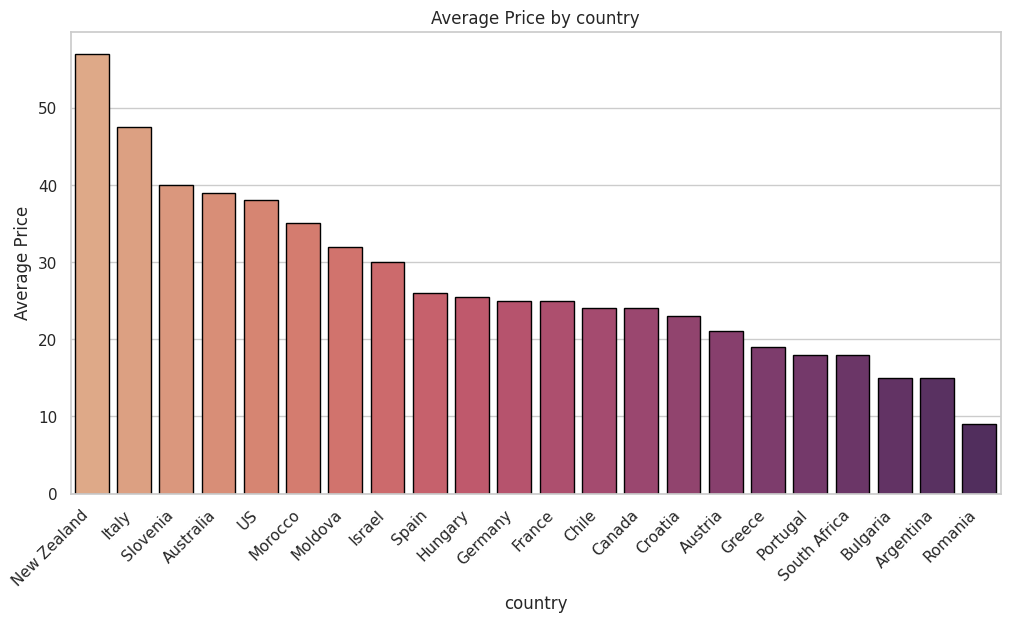

<ipython-input-148-ddd883d9f1ac>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_points_normalized.index, y=avg_points_normalized['Normalized Points'], palette='flare', edgecolor='black')


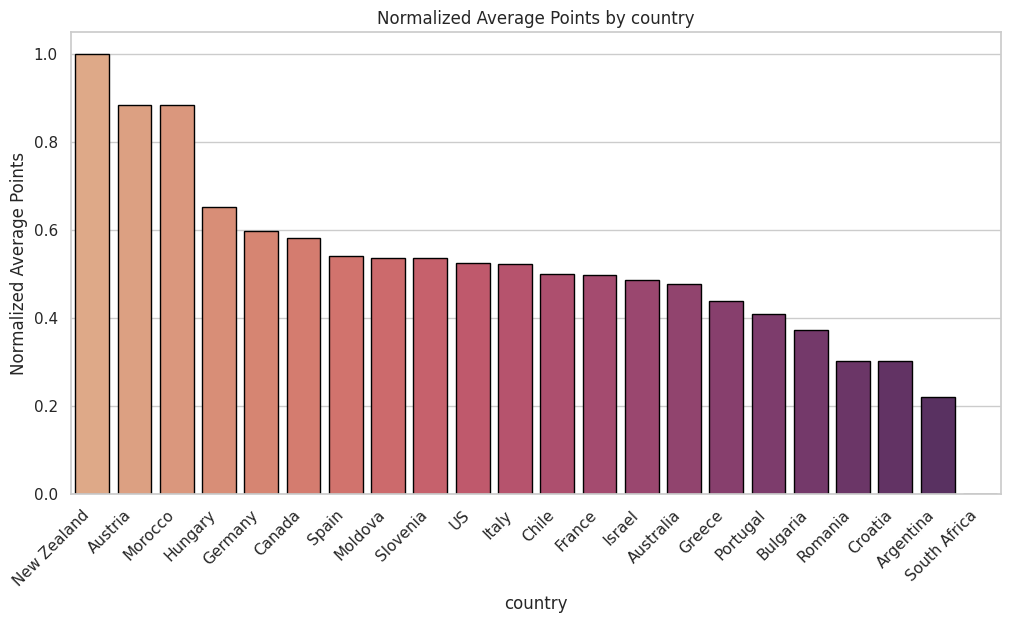

In [ ]:
# Plot average price by country
avg_price_by_group(column, df)

# Plot normalized average points by country
normalized_avg_points_by_group(column, df)

While it is interesting to see that New Zealand has the highest average price and points, we must note that there is only one entry for this country and so this may not be a good representative.

Of the top producing countries (those with the highest wine count) we see that Italy has the highest average price, followed by the US. These two countries rank right in the middle, however, for their average points.

On the other hand, Romania is the one of the top producing countries (7th highest) and has the second lowest average price of all the countries and 4th lowest average points. South Africa too is among the top producing countries (9th) and has one of the lowest average prices (4th lowest of all countries) as well as the lowest average points of all the countries..

There are a few aspects that may affect the price of wine in each country. We know from the price-points study that there is a positive correlation between the points and the price, and we can see from the above two plots that the countries for the most part hold the same general position for both average price and average points. However, the prices may also be influenced by the country's economy or the quantity of wine being produced, amongst other factors. These factors could possibly be what effects the prices of countries like Australia where the average price is high, but the average points is low. Or countries like Austria, where the average price is rather low but the average points is very high.

###### Combined Results for Countries:

We now wish to view all the normalized values of the count, average price and average points for each country.


Would you like to order the result by:

1 : count
2 : price
3 : points

Please enter 1, 2 or 3:
1


<Figure size 1500x800 with 0 Axes>

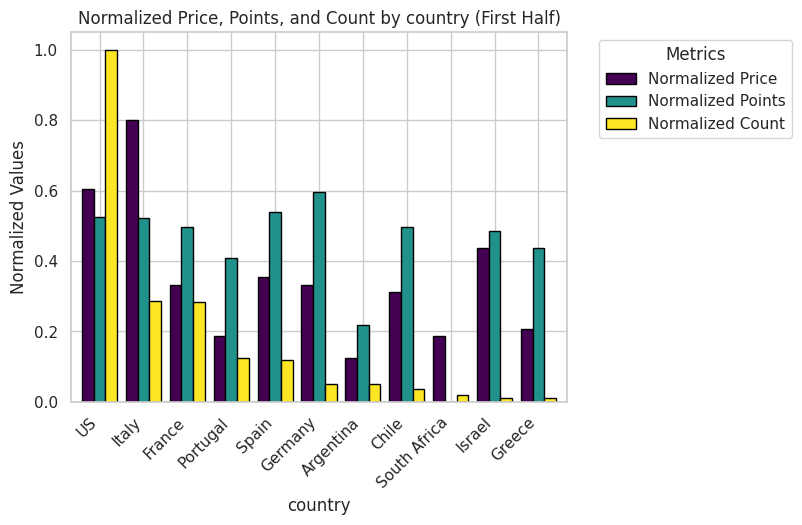

<Figure size 1500x800 with 0 Axes>

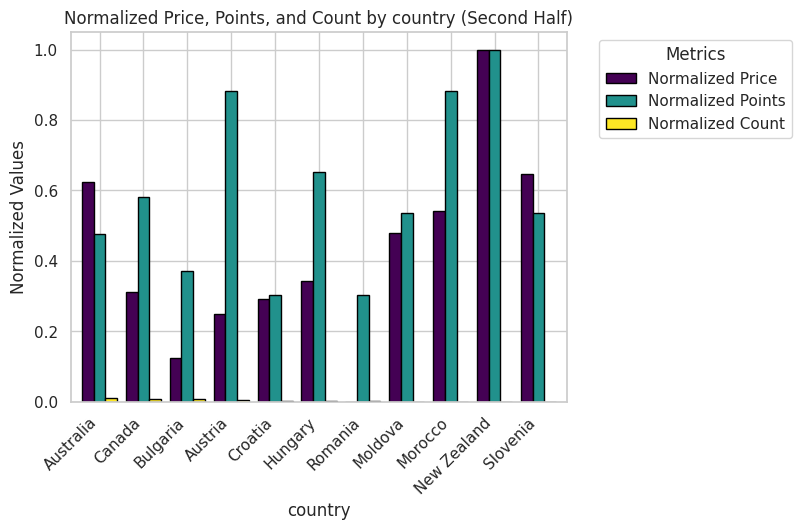

In [ ]:
# Plot all normalized values for each country
normalized_values_by_group(column, df)

The above two plots further verify the previous claims. It is also interesting to see that the countries that have a higher wine count appear to have slightly lower average prices and average points for the most part when compared to the countries producing fewer wines. However, there is insufficient data to be confident in this result and one would need far more entries to verify this.

##### Varieties:

First let us see which wine varieties have the highest and lowest points and prices.

###### Scatter Plot of Average Prices and Avergae Points of All Wine Varieties:

Top 5 Varieties by Price:
                   Average Price  Average Points
variety                                         
Tinta de Toro               91.5       94.166667
Tannat                      90.0       95.000000
Alicante Bouschet           68.5       88.000000
Nebbiolo                    68.0       90.361702
Shiraz                      65.0       90.000000

Top 5 Varieties by Points:
                    Average Price  Average Points
variety                                          
Tannat                       90.0       95.000000
Friulano                     57.5       94.500000
Tinta de Toro                91.5       94.166667
Provence red blend           44.0       94.000000
Tannat-Cabernet              40.0       93.666667

Bottom 5 Varieties by Price:
                      Average Price  Average Points
variety                                            
Chenin Blanc                   10.0            85.0
Ugni Blanc-Colombard           10.0            86.0
Portuguese Spar

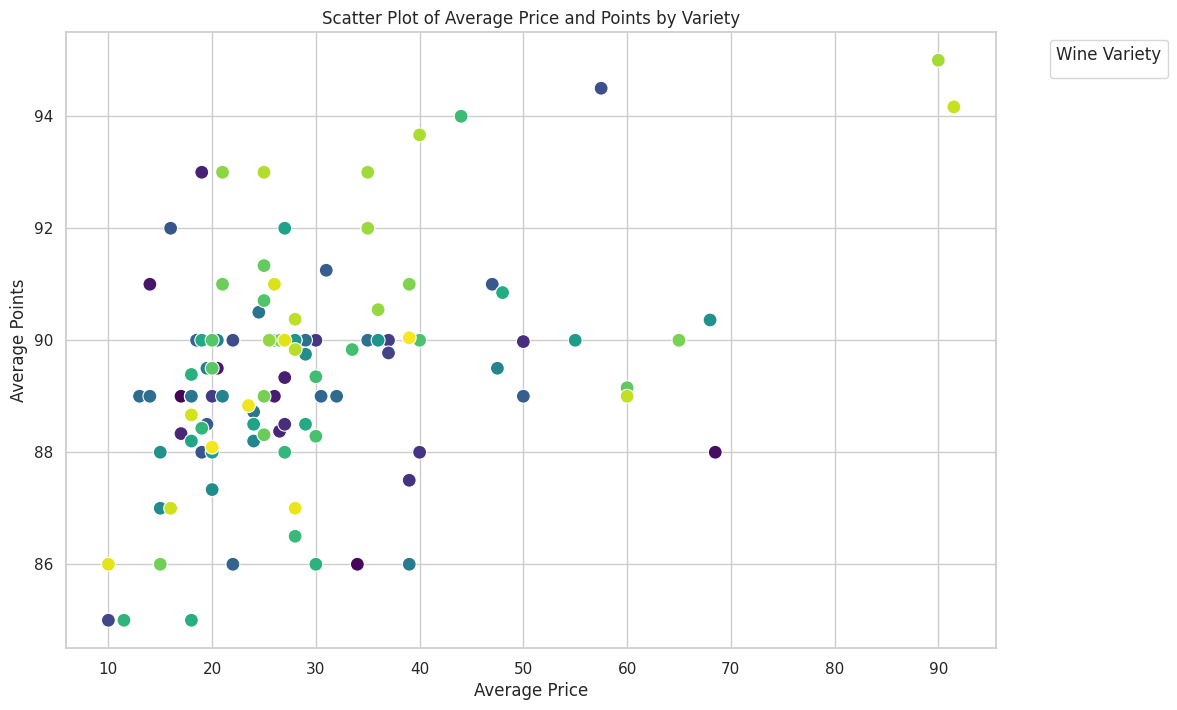

In [ ]:
# Calculate average price and average points for all wine varieties
avg_price_by_variety = wine_df.groupby('variety')['price'].median()
avg_points_by_variety = wine_df.groupby('variety')['points'].mean()

# Convert the results to a DataFrame
average_data = pd.DataFrame({'Average Price': avg_price_by_variety, 'Average Points': avg_points_by_variety})

# Find top and bottom 5 varieties by price
top_varieties_by_price = average_data.nlargest(5, 'Average Price')
bottom_varieties_by_price = average_data.nsmallest(5, 'Average Price')

# Find top and bottom 5 varieties by points
top_varieties_by_points = average_data.nlargest(5, 'Average Points')
bottom_varieties_by_points = average_data.nsmallest(5, 'Average Points')

# Display the results
print("Top 5 Varieties by Price:")
print(top_varieties_by_price)

print("\nTop 5 Varieties by Points:")
print(top_varieties_by_points)

print("\nBottom 5 Varieties by Price:")
print(bottom_varieties_by_price)

print("\nBottom 5 Varieties by Points:")
print(bottom_varieties_by_points)

# Plot a scatter plot of average points and average price of all varieties
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average Price', y='Average Points', hue=average_data.index, data=average_data, palette='viridis', s=100, legend=False)
plt.title('Scatter Plot of Average Price and Points by Variety')
plt.xlabel('Average Price')
plt.ylabel('Average Points')
plt.legend(title='Wine Variety', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

It is evident that, of the top wines, Tinta de Toro and Tannat are the highest ranking in both price and points.

Of the low ranking wines, Chenin Blanc holds the bottom spot in both points and price. The Portuguese Sparkling is also low in both price and points aspects.

Now let us do the same analysis as we did for the countries and apply it to the top 20 most occurring wine varieties in the dataset.

In [ ]:
# Inputs for functions for wine varieties analysis
column = 'variety'
df = wine_df

###### Wine Count per Variety (Top 20):

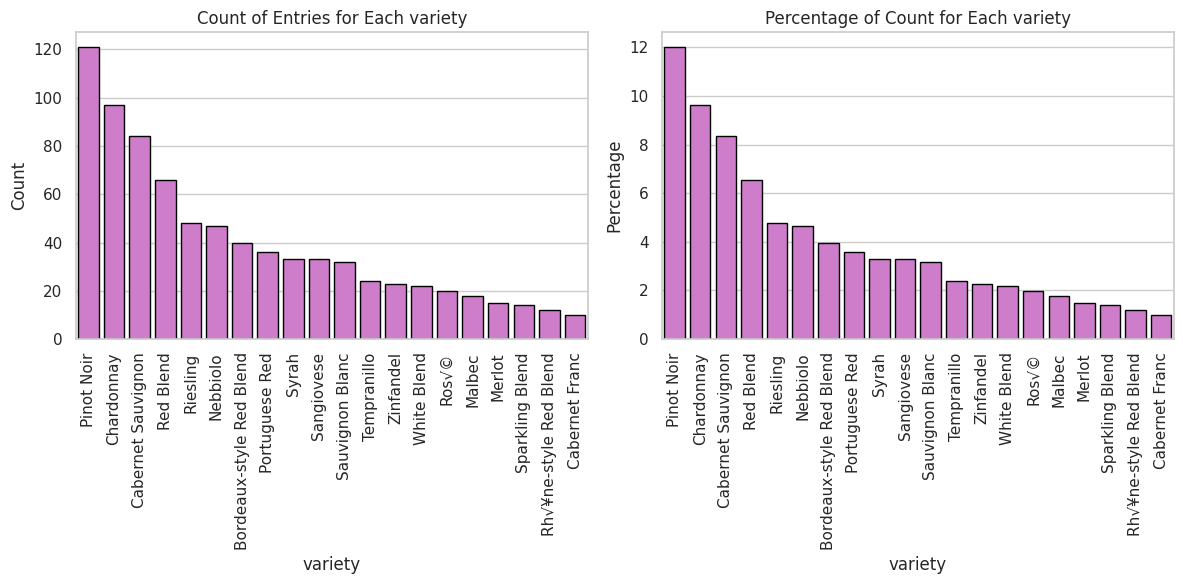

In [ ]:
# Plot wine count for top 20 varieties
count_and_percent_by_group(column, df)

We see that the variety with the highest count is that of Pinot Noir (making up ~12\% of the dataset), followed by Chardonnay (~9.5\%) and Cabernet Sauvignon (~8.5\%) respectively. There are too many varieties the view them all, however, we can see from the above plot which are the most popular. It is interesting to note that of the top and bottom wines in average points and price, the only one featured in the top counts is the Nebbiolo. Otherwise it appears that the highest and lowest ranked wine varieties by price and points are not commonly listed.

###### Average price and Points per Variety (Top 20):

<ipython-input-148-ddd883d9f1ac>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='flare', edgecolor='black')


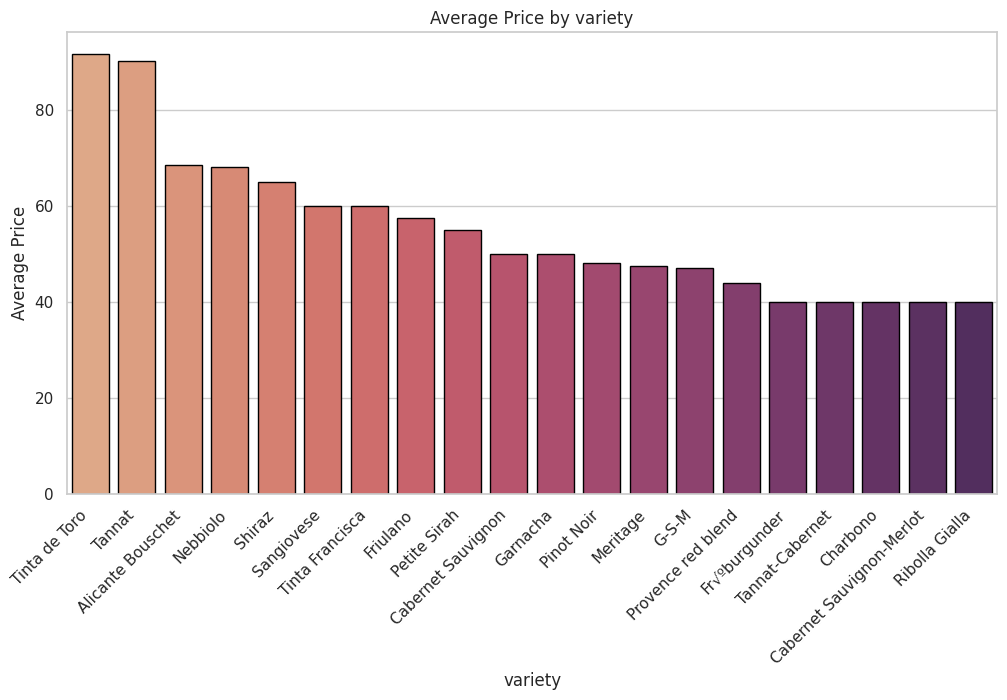

<ipython-input-148-ddd883d9f1ac>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_points_normalized.index, y=avg_points_normalized['Normalized Points'], palette='flare', edgecolor='black')


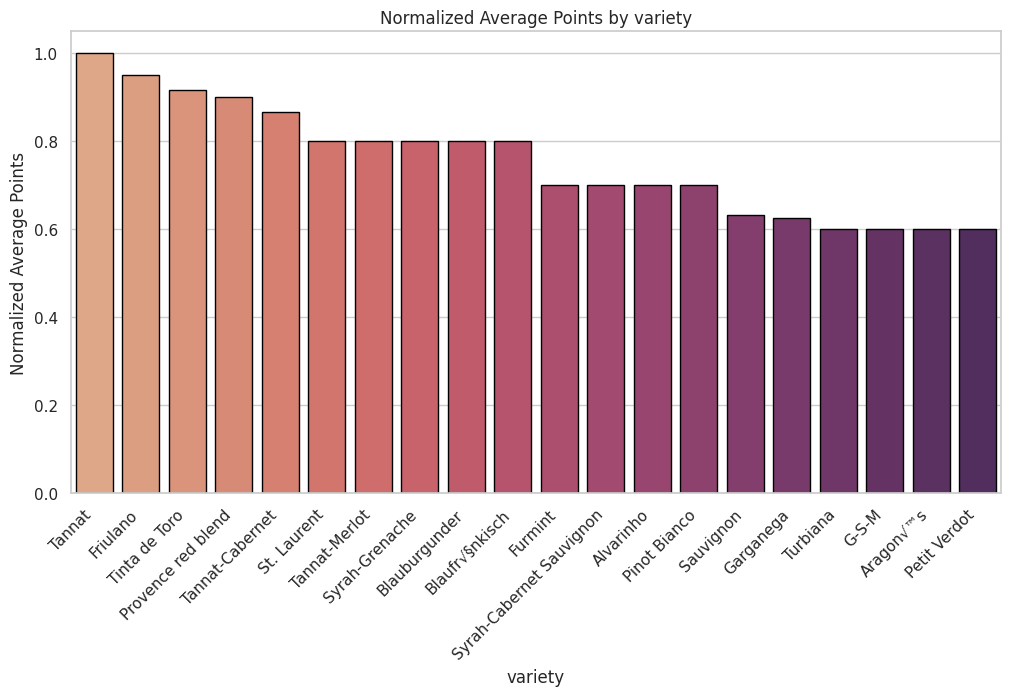

In [ ]:
# Plot average price by variety
avg_price_by_group(column, df)

# Plot normalized average points by variety
normalized_avg_points_by_group(column, df)

When comparing the top 20 average price wine varieties and the top 20 average points wine varieties, we can notice that only six of the wine varieties appear in both top 20 lists. Those are Tannat, Tinta de Toro, Friulano, G-S-M, Provence Red Blend, and Tannat-Cabernet.

###### Combined Results for Wine Varieties (Top 20):


Would you like to order the result by:

1 : count
2 : price
3 : points

Please enter 1, 2 or 3:
1


<Figure size 1500x800 with 0 Axes>

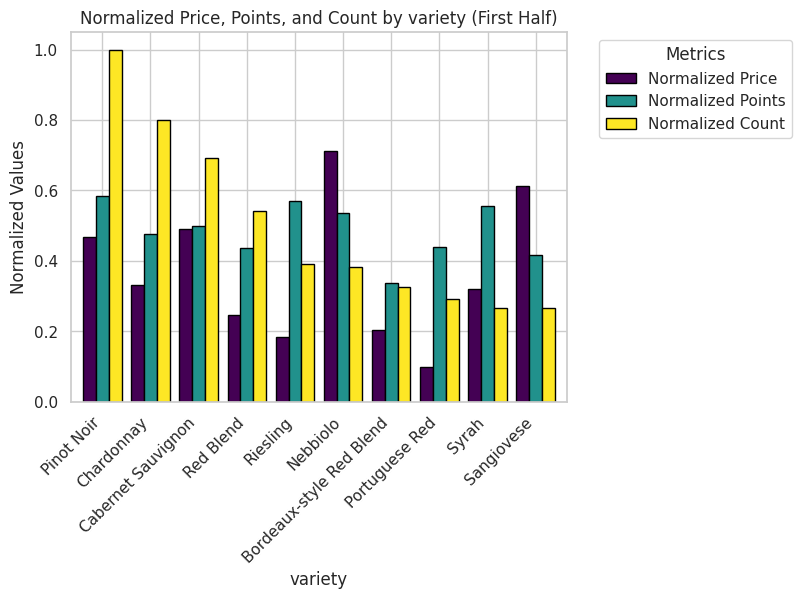

<Figure size 1500x800 with 0 Axes>

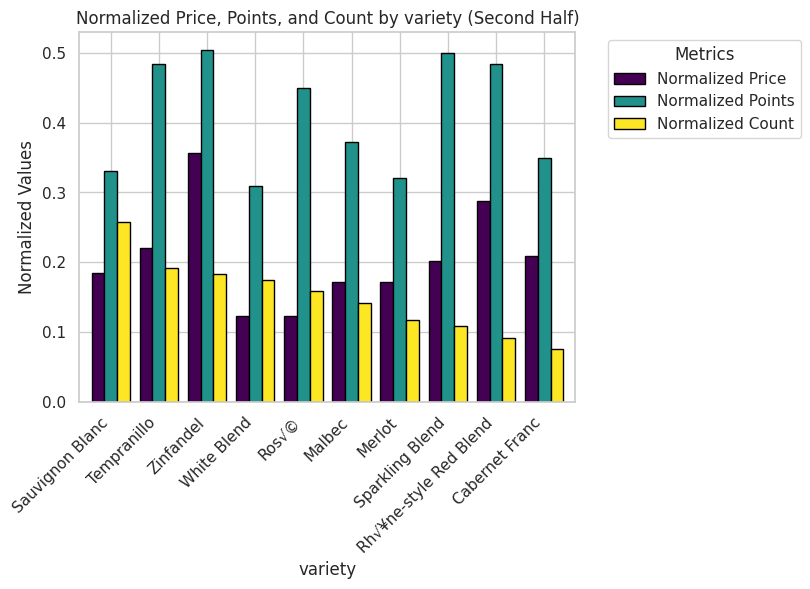

In [ ]:
# Plot all normalized values for each variety
normalized_values_by_group(column, df)

It is interesting to see that the average points appear to be higher for the 11th-20th most frequent wine varieties than the 1st-10th most frequent wine varieties.

##### Countries and Their Top Wine Varieties:

We have seen the overall data for the countries and the overall data for different varieties. Let us now look at the data for top producing countries and the top wine varieties produced in those countries.

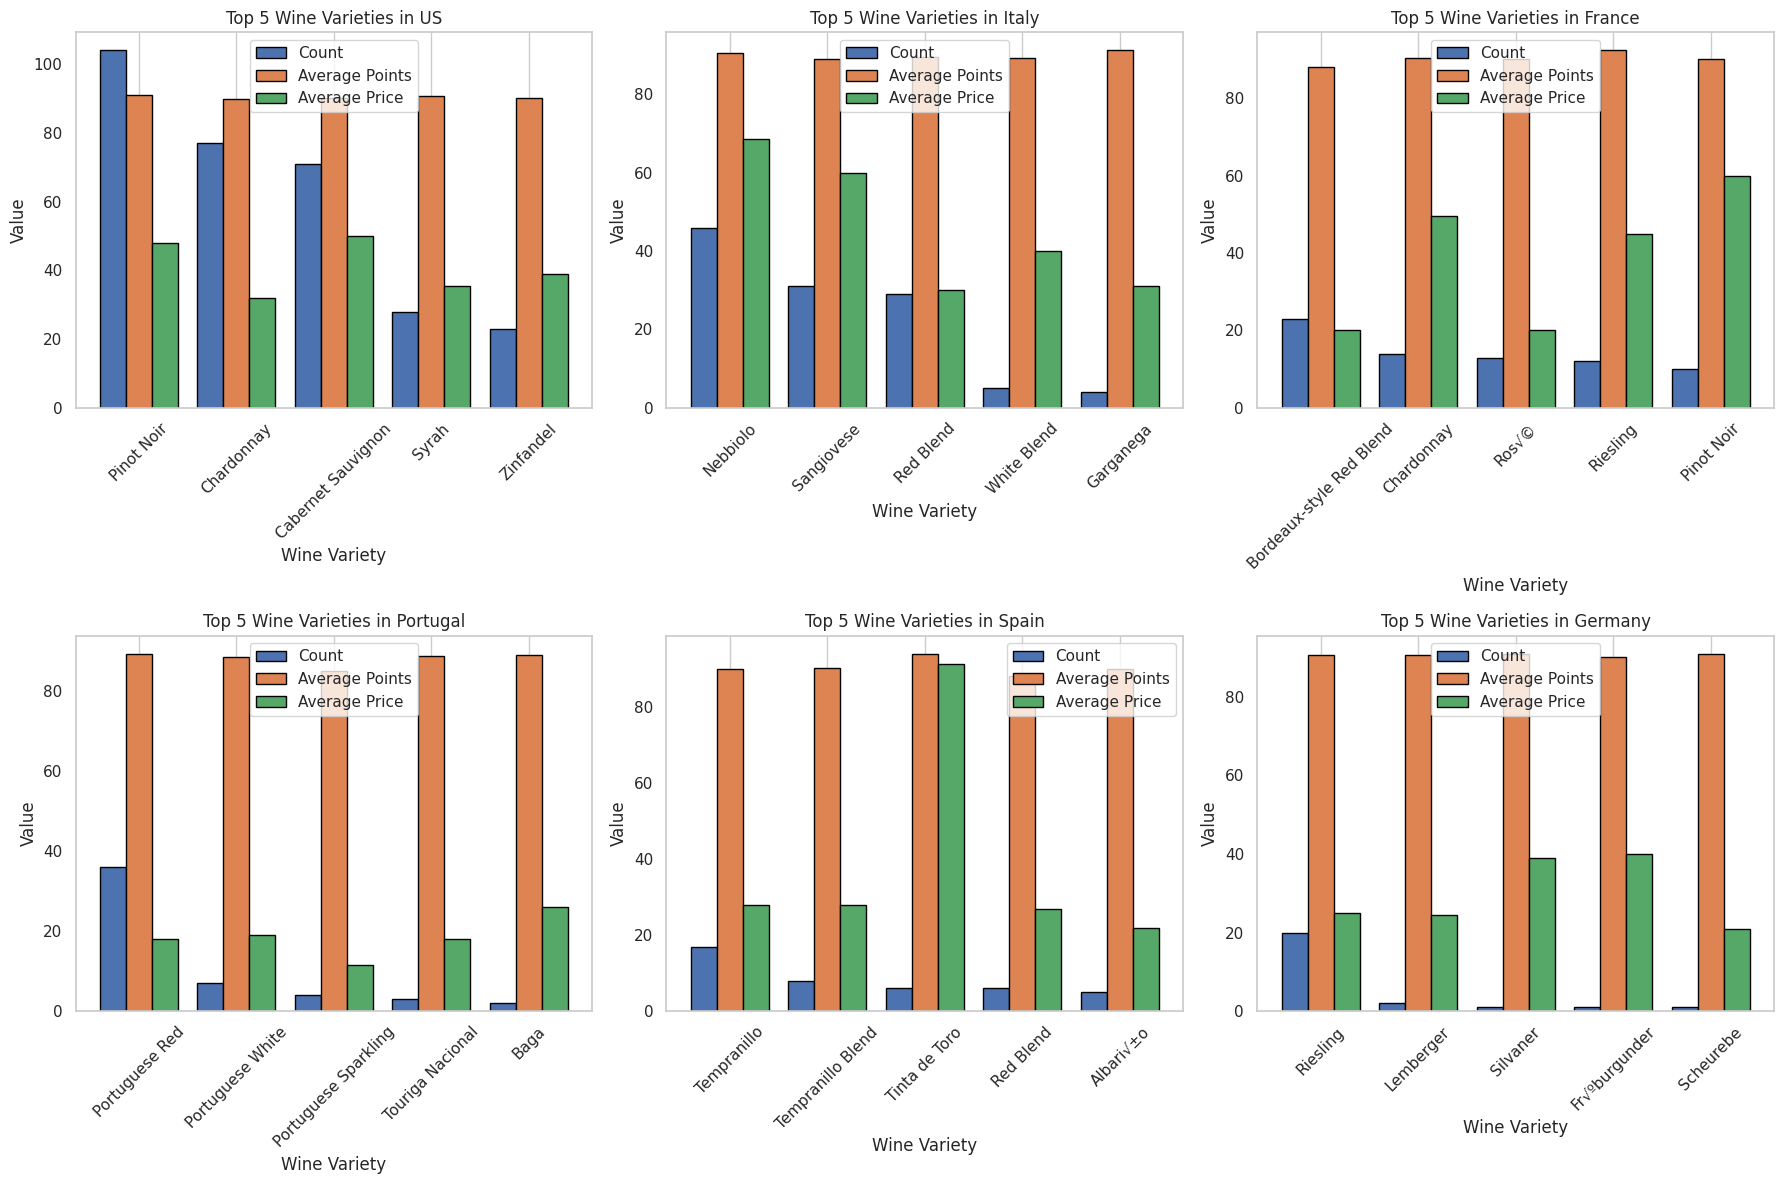

In [ ]:

# Number of countries and varieties from each country
num_countries = 6
num_varieties = 5


# Find the top countries with the highest wine counts
top_countries = wine_df['country'].value_counts().head(num_countries).index

# Initialize the figure
plt.figure(figsize=(18, 12))

# Create plots for each country and find the data for each variety
for i, country in enumerate(top_countries, 1):
    plt.subplot(2, 3, i)

    # Filter data for the current country
    country_data = wine_df[wine_df['country'] == country]

    # Find the top most frequent wine varieties for the current country and calculate metrics
    top_varieties_data = country_data['variety'].value_counts().head(num_varieties)
    top_varieties = top_varieties_data.index

    # Initialize a DataFrame to store calculated metrics
    metrics_df = pd.DataFrame(index=top_varieties, columns=['Count', 'Average Points', 'Average Price'])

    # Populate the DataFrame with the count, average points, and average price
    for variety in top_varieties:
        variety_data = country_data[country_data['variety'] == variety]
        metrics_df.loc[variety, 'Count'] = top_varieties_data[variety]
        metrics_df.loc[variety, 'Average Points'] = variety_data['points'].mean()
        metrics_df.loc[variety, 'Average Price'] = variety_data['price'].median()


    # Plotting
    metrics_df.plot(kind='bar', ax=plt.gca(), width=0.8, edgecolor='black')
    plt.title(f'Top {num_varieties} Wine Varieties in {country}')
    plt.xlabel('Wine Variety')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


The above plot identifies the top 6 countries with the highest frequency of wine and the top 5 most frequent wine varieties within those countries. From these plots we can see the large amount of wine being produced in the US as we saw in the first visualisation of the countries section. We can again see the high ranking in price and points of the Tinta de Toro which we can see is a common wine in Spain. What is interesting to note is that of the top 6 countries, only Italy produces more of the most expensive wine variety (Nebbiolo) and for the most part, the frequency of wine in Italy decreases with price.

#### Descriptions:

It may be interesting to see the most common words used to describe the various wines. For this we may use a Word Cloud.


##### Word Cloud:

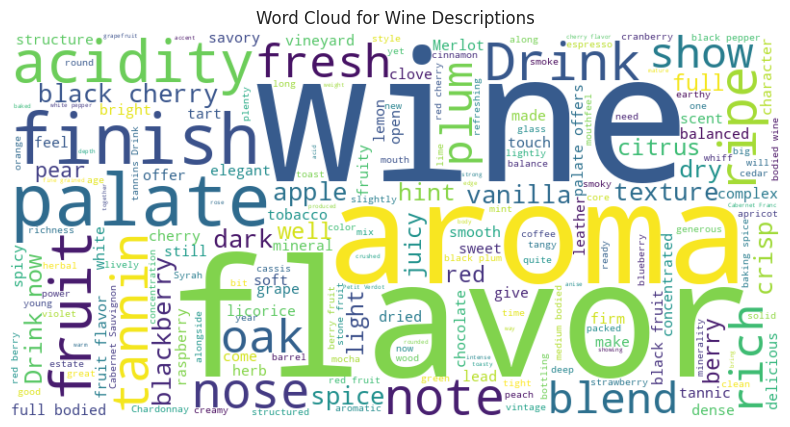

In [ ]:
# Word Clouds for Descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(wine_df['description']))
# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Wine Descriptions')
plt.show()

Amongst the descriptions, the most abundant are various fruit. Some examples include black cherry, pear, berry, peach, strawberry and plum to name a view. Also amongst the descriptions are various sweet flavours such as chocolate, vanilla and licorice. Somewhat popular are caffeine flavours such as coffee, mocha and espresso, as well dark and rich flavours like tobacco, oak, smoke and leather. The dataset overall appears to be made up of a large variety of wines.